# CBE 154 Membrane Seperation Lab
Presented by Rahil Shaik, Ethan Mibu, Alex Quemuel, Sneha Kancharla

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")

### Preprocessing

In [243]:
flow_trans = 20 # sho rate

In [244]:
df_n2_co = pd.read_csv("data/Membrane Separation Lab Raw Data - Pure NItrogen Transmissibility.csv")
df_o2_co = pd.read_csv("data/Membrane Separation Lab Raw Data - Pure NItrogen Transmissibility.csv")

df_o2_counter = pd.read_csv("/Users/rahilshaik/cbe154/membrane-seperation/data/Membrane Separation Lab Raw Data - Pure O2 Transmissibility Counter-Current (RFR=20).csv")
df_n2_counter = pd.read_csv("/Users/rahilshaik/cbe154/membrane-seperation/data/Membrane Separation Lab Raw Data - Pure N2 Transmissibility Counter-Current (RFR=20).csv")

In [245]:
df_co_10 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 10 psi.csv")
df_co_20 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 20 psi.csv")
df_co_30 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 30 psi.csv")
df_co_40 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 40 psi.csv")
df_co_50 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 50 psi.csv")
df_co_60 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 60 psi.csv")
df_co_70 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 70 psi.csv")
df_co_80 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 80 psi.csv")
df_co_90 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Co-Current Flow, 90 psi.csv")

df_cos = [df_co_10, df_co_20, df_co_30, df_co_40, df_co_50, df_co_60, df_co_70, df_co_80, df_co_90]

In [246]:
df_count_10 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 10 psi.csv")
df_count_20 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 20 psi.csv")
df_count_30 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 30 psi.csv")
df_count_40 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 40 psi.csv")
df_count_50 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 50 psi.csv")
df_count_60 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 60 psi.csv")
df_count_70 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 70 psi.csv")
df_count_80 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 80 psi.csv")
df_count_90 = pd.read_csv("data/Membrane Separation Lab Raw Data - Membrane Separation Counter-Current Flow, 90 psi.csv")

df_counters = [df_count_10, df_count_20, df_count_30, df_count_40, df_count_50, df_count_60, df_count_70, df_count_80, df_count_90]

Expression for converting sho-rate to $\frac{ft^3}{s}$

In [247]:
def sho_conv(flow):
    return -3.1062*1e-4 + 7.87233*1e-5 * flow

In [248]:
dfs = df_cos + df_counters

for df in dfs:
    flow_feet_s = df["Flow Rate"].apply(sho_conv)
    df["Retentate_flow (SLPM)"] = flow_feet_s * 1699.01

Converting purities to mass fractions

In [249]:
for df in dfs:
    df["Permeate Purity"] = df["Permeate Purity"] / 100
    df["Retentate Purity"] = df["Retentate Purity"] / 100

In [250]:
df

,Pressure (psi),Flow Rate,Permeate Flow,Retentate Purity,Retentate Pressure,Permeate Purity,Temperature,Retentate_flow (SLPM)
0,90,20,4.4,0.017,88.8,0.265,70.7,2.147287
1,90,30,4.6,0.019,88.7,0.290,70.7,3.484804
2,90,40,4.7,0.024,88.6,0.310,70.7,4.822320
3,90,50,4.9,0.030,88.6,0.328,70.7,6.159837
4,90,60,5.1,0.043,88.5,0.348,70.6,7.497354
5,90,70,5.2,0.051,88.4,0.362,70.6,8.834871
6,90,80,5.3,0.060,88.4,0.375,70.6,10.172387
7,90,90,5.4,0.068,88.3,0.386,70.6,11.509904
8,90,100,5.5,0.073,88.3,0.392,70.6,12.847421
9,90,110,5.6,0.080,88.2,0.401,70.6,14.184938


In [251]:
df_n2_co

,retentate pressure (psi),feed pressure (psi),retentate oxygen purity (%),permeate oxygen purity,feed flow rate (sho-rate),permeate flow rate (SLPM)
0,8.8,10,0,0,NaN,-0.4
1,18.8,20,0,0,NaN,-0.1
2,28.8,30,0,0,NaN,0.2
3,38.4,40,0,0,NaN,0.5
4,48.4,50,0,0,NaN,0.9
5,58.4,60,0,0,NaN,1.3
6,68.1,70,0,0,NaN,1.7
7,78.1,80,0,0,NaN,2.2
8,88.5,90,0,0,NaN,2.7


In [252]:
L_per_mol = 22.414  # L/mol at STP
sec_per_min = 60
psi_to_Pa = lambda p: (p + 14.7) * 6894.76  # psi to absolute Pa

In [253]:
fiber_diam = 135 * 1e-6
fiber_length = 50.8 * 1e-2
A_fiber = np.pi * fiber_diam * fiber_length
num_fibs = 38000
A_tot = num_fibs * A_fiber

### Data Analysis Question 1
Determine the transmissibility of pure nitrogen and of pure oxygen by plotting the permeate
flux as a function of the total pressure difference across the membrane, Δp. (You expect a
straight line through the origin.) Are the transmissibilities constant over the entire range of
pressure? What might cause deviation from the ideal expectation? What is the ideal
selectivity of the membrane? Do you expect the type of flow i.e. cocurrent versus
countercurrent to influence your measurement of the transmissibility? Why or why not? It
is a plus to support your analysis with data.

In [254]:
def process_flux_data(df):
    df = df.copy()
    df['permeate_flow_mol_s'] = df['permeate flow rate (SLPM)'] / (L_per_mol * sec_per_min)
    df['retentate_pressure_Pa'] = psi_to_Pa(df['retentate pressure (psi)'])
    df['permeate_pressure_Pa'] = psi_to_Pa(0)  # atmospheric pressure
    df['delta_p'] = df['retentate_pressure_Pa'] - df['permeate_pressure_Pa']
    df['membrane_area_m2'] = A_tot # m^2
    df['flux'] = df['permeate_flow_mol_s'] / df['membrane_area_m2']
    return df

Computing transmissibility for $N_2$

In [255]:
df_n2_co

,retentate pressure (psi),feed pressure (psi),retentate oxygen purity (%),permeate oxygen purity,feed flow rate (sho-rate),permeate flow rate (SLPM)
0,8.8,10,0,0,NaN,-0.4
1,18.8,20,0,0,NaN,-0.1
2,28.8,30,0,0,NaN,0.2
3,38.4,40,0,0,NaN,0.5
4,48.4,50,0,0,NaN,0.9
5,58.4,60,0,0,NaN,1.3
6,68.1,70,0,0,NaN,1.7
7,78.1,80,0,0,NaN,2.2
8,88.5,90,0,0,NaN,2.7


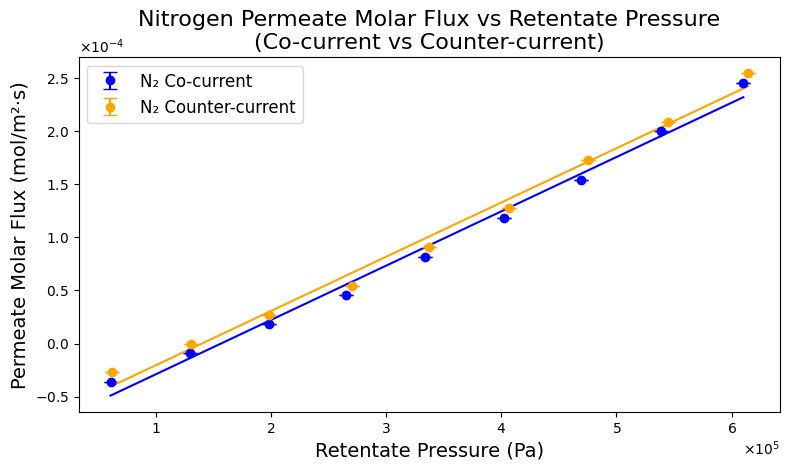

Co-current N₂ Transmissibility: 5.113e-10 mol/m²·s·Pa
Counter-current N₂ Transmissibility: 5.108e-10 mol/m²·s·Pa


In [256]:
df_n2_co = process_flux_data(df_n2_co)
df_n2_counter = process_flux_data(df_n2_counter)
slope_n2_co, intercept_n2_co, _, _, _ = linregress(df_n2_co['delta_p'], df_n2_co['flux'])
slope_n2_counter, intercept_n2_counter, _, _, _ = linregress(df_n2_counter['delta_p'], df_n2_counter['flux'])
flux_error_n2_co = 1.83251709932974E-11
flux_error_n2_counter = 1.82361052937463E-11
plt.figure(figsize=(8, 5))
plt.errorbar(df_n2_co['delta_p'], df_n2_co['flux'], yerr=flux_error_n2_co, fmt='o', capsize=5,
             label='N₂ Co-current', color='blue', ecolor='blue')
plt.plot(df_n2_co['delta_p'], slope_n2_co * df_n2_co['delta_p'] + intercept_n2_co, '-', color='blue')
plt.errorbar(df_n2_counter['delta_p'], df_n2_counter['flux'], yerr=flux_error_n2_counter, fmt='o', capsize=5,
             label='N₂ Counter-current', color='orange', ecolor='orange')
plt.plot(df_n2_counter['delta_p'], slope_n2_counter * df_n2_counter['delta_p'] + intercept_n2_counter, '-', color='orange')
plt.xlabel('Retentate Pressure (Pa)', fontsize=14)
plt.ylabel('Permeate Molar Flux (mol/m²·s)', fontsize=14)
plt.title('Nitrogen Permeate Molar Flux vs Retentate Pressure\n(Co-current vs Counter-current)', fontsize=16)
plt.legend(fontsize=12)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.grid(False)
plt.tight_layout()
plt.show()
print(f"Co-current N₂ Transmissibility: {slope_n2_co:.3e} mol/m²·s·Pa")
print(f"Counter-current N₂ Transmissibility: {slope_n2_counter:.3e} mol/m²·s·Pa")


Computing transmissibility for $O_2$

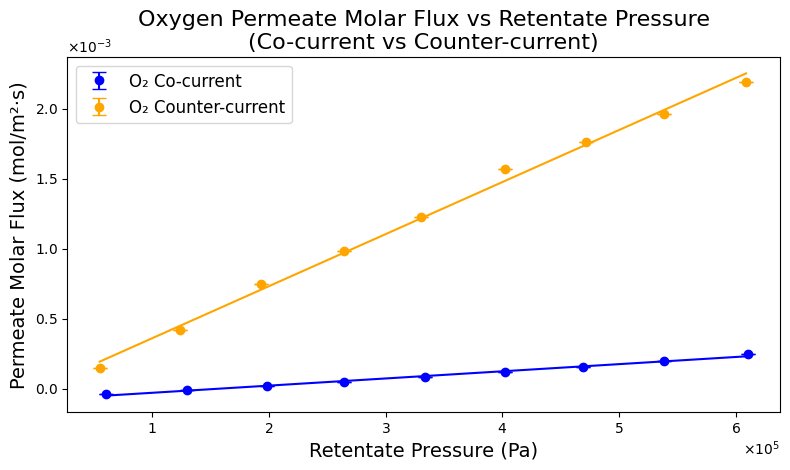

Co-current O₂ Transmissibility: 5.113e-10 mol/m²·s·Pa
Counter-current O₂ Transmissibility: 3.716e-09 mol/m²·s·Pa


In [257]:
df_o2_co = process_flux_data(df_o2_co)
df_o2_counter = process_flux_data(df_o2_counter)
slope_o2_co, intercept_o2_co, _, _, _ = linregress(df_o2_co['delta_p'], df_o2_co['flux'])
slope_o2_counter, intercept_o2_counter, _, _, _ = linregress(df_o2_counter['delta_p'], df_o2_counter['flux'])
flux_error_o2_co = 7.13196251944945E-11
flux_error_o2_counter = 9.48E-11
plt.figure(figsize=(8, 5))
plt.errorbar(df_o2_co['delta_p'], df_o2_co['flux'], yerr=flux_error_o2_co, fmt='o', capsize=5,
             label='O₂ Co-current', color='blue', ecolor='blue')
plt.plot(df_o2_co['delta_p'], slope_o2_co * df_o2_co['delta_p'] + intercept_o2_co, '-', color='blue')
plt.errorbar(df_o2_counter['delta_p'], df_o2_counter['flux'], yerr=flux_error_o2_counter, fmt='o', capsize=5,
             label='O₂ Counter-current', color='orange', ecolor='orange')
plt.plot(df_o2_counter['delta_p'], slope_o2_counter * df_o2_counter['delta_p'] + intercept_o2_counter, '-', color='orange')
plt.xlabel('Retentate Pressure (Pa)', fontsize=14)
plt.ylabel('Permeate Molar Flux (mol/m²·s)', fontsize=14)
plt.title('Oxygen Permeate Molar Flux vs Retentate Pressure\n(Co-current vs Counter-current)', fontsize=16)
plt.legend(fontsize=12)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
plt.grid(False)
plt.tight_layout()
plt.show()
print(f"Co-current O₂ Transmissibility: {slope_o2_co:.3e} mol/m²·s·Pa")
print(f"Counter-current O₂ Transmissibility: {slope_o2_counter:.3e} mol/m²·s·Pa")


In [258]:
k_o2 = slope_o2_co # mol / m^2 s Pa
k_o2_counter = slope_o2_counter # mol / m^2 s Pa

k_n2 = slope_n2_co # mol / m^2 s Pa
k_n2_counter = slope_n2_counter


In [259]:
ideal_selectivity = k_o2_counter / k_n2_counter
print(f"Ideal Selectivity (α_O₂/N₂) = {ideal_selectivity:.2f}")

Ideal Selectivity (α_O₂/N₂) = 7.28


### Data Analysis Question 2
For each data point taken with air as feed, carry out a mass balance on the system. Note
that you have measured enough flow rates and compositions to have redundancy. Check
the feed flow rate calculated from an overall mass balance against that calculated from a
component balance. How different are the quantities?

Overall Balance:
$$
F = R + P
$$


$O_2$ Balance:
$$
X_F F = X_R R + X_P P
$$



In [260]:
df_co_20

,Pressure (psi),Flow Rate,Permeate Flow,Permeate Purity,Retentate Pressure,Retentate Purity,Temperature,Retentate_flow (SLPM)
0,20,20,0.1,0.284,18.8,0.148,74.2,2.147287
1,20,30,0.1,0.298,18.7,0.160,74.0,3.484804
2,20,40,0.1,0.308,18.6,0.189,74.0,4.822320
3,20,50,0.1,0.318,18.1,0.175,73.9,6.159837
4,20,60,0.1,0.321,18.0,0.179,73.7,7.497354
5,20,70,0.1,0.325,18.0,0.183,73.7,8.834871
6,20,80,0.1,0.328,17.9,0.185,73.7,10.172387
7,20,90,0.1,0.331,17.7,0.188,73.6,11.509904
8,20,100,0.1,0.333,17.1,0.190,73.6,12.847421
9,20,110,0.1,0.333,17.1,0.191,73.5,14.184938


In [261]:
air_o2_comp = 0.21

In [262]:
for df in dfs:
    df["feed_flow_mass (SLPM)"] = df["Permeate Flow"] + df["Retentate_flow (SLPM)"]
    df["feed_flow_comp (SLPM)"] = (df["Retentate Purity"] * df["Retentate_flow (SLPM)"] + df["Permeate Flow"] * df["Permeate Purity"]) / air_o2_comp

For pressure of 20 psi, the below flow rates from the mass balance and component balance are shown below

In [263]:
# dfs[1][["feed_flow_mass (SLPM)", "feed_flow_comp (SLPM)"]]
dfs[1]

,Pressure (psi),Flow Rate,Permeate Flow,Permeate Purity,Retentate Pressure,Retentate Purity,Temperature,Retentate_flow (SLPM),feed_flow_mass (SLPM),feed_flow_comp (SLPM)
0,20,20,0.1,0.284,18.8,0.148,74.2,2.147287,2.247287,1.648564
1,20,30,0.1,0.298,18.7,0.160,74.0,3.484804,3.584804,2.796993
2,20,40,0.1,0.308,18.6,0.189,74.0,4.822320,4.922320,4.486755
3,20,50,0.1,0.318,18.1,0.175,73.9,6.159837,6.259837,5.284626
4,20,60,0.1,0.321,18.0,0.179,73.7,7.497354,7.597354,6.543459
5,20,70,0.1,0.325,18.0,0.183,73.7,8.834871,8.934871,7.853721
6,20,80,0.1,0.328,17.9,0.185,73.7,10.172387,10.272387,9.117579
7,20,90,0.1,0.331,17.7,0.188,73.6,11.509904,11.609904,10.461724
8,20,100,0.1,0.333,17.1,0.190,73.6,12.847421,12.947421,11.782428
9,20,110,0.1,0.333,17.1,0.191,73.5,14.184938,14.284938,13.060110


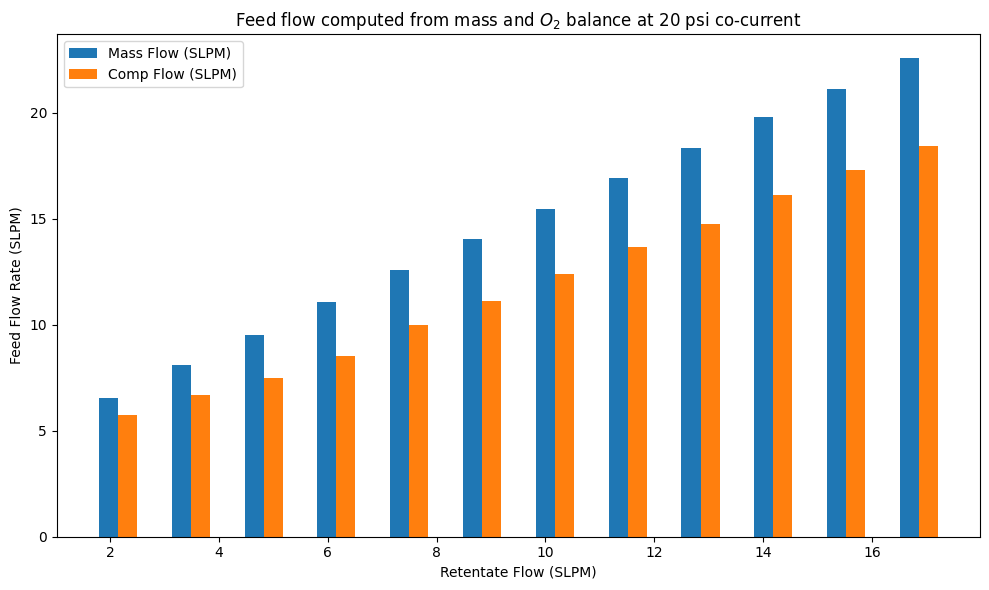

In [264]:
plt.figure(figsize=(10, 6))
bar_width = 0.35
x = df["Retentate_flow (SLPM)"]

plt.bar(x - bar_width/2, df["feed_flow_mass (SLPM)"], width=bar_width, label="Mass Flow (SLPM)")
plt.bar(x + bar_width/2, df["feed_flow_comp (SLPM)"], width=bar_width, label="Comp Flow (SLPM)")

plt.xlabel("Retentate Flow (SLPM)")
plt.ylabel("Feed Flow Rate (SLPM)")
plt.title("Feed flow computed from mass and $O_2$ balance at 20 psi co-current")
plt.legend()
plt.tight_layout()

plt.show()


### Data Analysis Question 4
Analyze your experimental data to describe how feed pressure and retentate flow rate affect
membrane performance. Most importantly, what are the effects of these variables on
retentate nitrogen purity and nitrogen recovery? Chemical engineers often use phase plots
to view a system in its totality (or as a whole). What opportunities are there here to perform
an analysis of your data with a phase plot? Consider plotting nitrogen recovery versus
nitrogen purity (or vice versa) at different pressures. What can you learn from such a plot?

In [265]:
df_co = pd.concat([df for df in df_cos], axis = 0)
df_counter = pd.concat([df for df in df_counters], axis = 0)

df_cos = [df_co_10, df_co_20, df_co_30, df_co_40, df_co_50, df_co_60, df_co_70, df_co_80, df_co_90]
df_counters = [df_count_10, df_count_20, df_count_30, df_count_40, df_count_50, df_count_60, df_count_70, df_count_80, df_count_90]

In [266]:
df_cos[3]

,Pressure (psi),Flow Rate,Permeate Flow,Permeate Purity,Retentate Pressure,Retentate Purity,Temperature,Retentate_flow (SLPM),feed_flow_mass (SLPM),feed_flow_comp (SLPM)
0,40,20,1.2,0.277,39.4,0.099,72.8,2.147287,3.347287,2.595150
1,40,30,1.2,0.320,39.0,0.098,72.8,3.484804,4.684804,3.454813
2,40,40,1.2,0.322,39.0,0.122,72.7,4.822320,6.022320,4.641539
3,40,50,1.3,0.327,38.9,0.129,72.7,6.159837,7.459837,5.808186
4,40,60,1.3,0.348,38.9,0.137,72.8,7.497354,8.797354,7.045417
5,40,70,1.4,0.354,38.5,0.142,72.7,8.834871,10.234871,8.334055
6,40,80,1.4,0.356,38.3,0.148,72.7,10.172387,11.572387,9.542444
7,40,90,1.4,0.372,38.2,0.152,72.8,11.509904,12.909904,10.810978
8,40,100,1.4,0.376,38.2,0.155,72.7,12.847421,14.247421,11.989287
9,40,110,1.4,0.382,38.0,0.159,72.7,14.184938,15.584938,13.286691


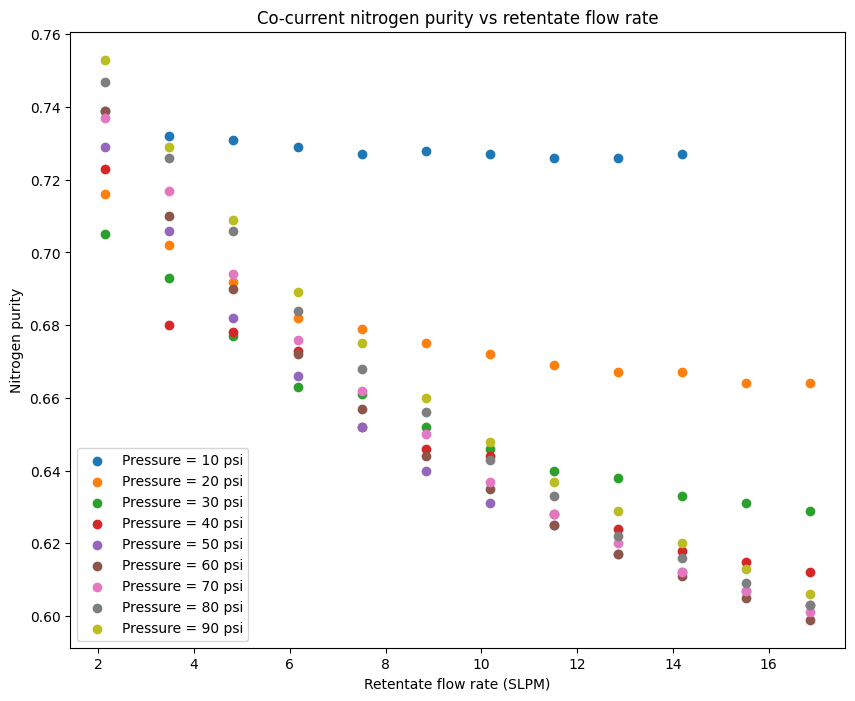

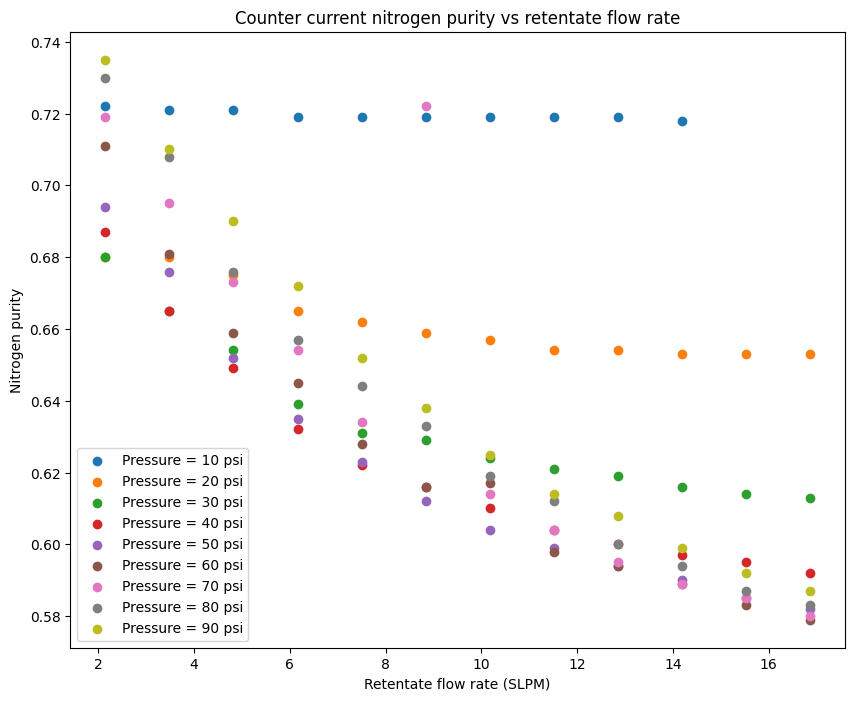

In [267]:
plt.figure(figsize=(10,8))
for df in df_cos:
    plt.title("Co-current nitrogen purity vs retentate flow rate")
    plt.scatter(df["Retentate_flow (SLPM)"], 1-df["Permeate Purity"], label = "Pressure = {} psi".format(df["Pressure (psi)"].iloc[0]))
    plt.ylabel("Nitrogen purity")
    plt.xlabel("Retentate flow rate (SLPM)")
    plt.legend()
plt.show()

plt.figure(figsize=(10,8))
for df in df_counters:
    plt.title("Counter current nitrogen purity vs retentate flow rate")
    plt.scatter(df["Retentate_flow (SLPM)"], 1-df["Permeate Purity"], label = "Pressure = {} psi".format(df["Pressure (psi)"].iloc[0]))
    plt.ylabel("Nitrogen purity")
    plt.xlabel("Retentate flow rate (SLPM)")
    plt.legend()
plt.show()

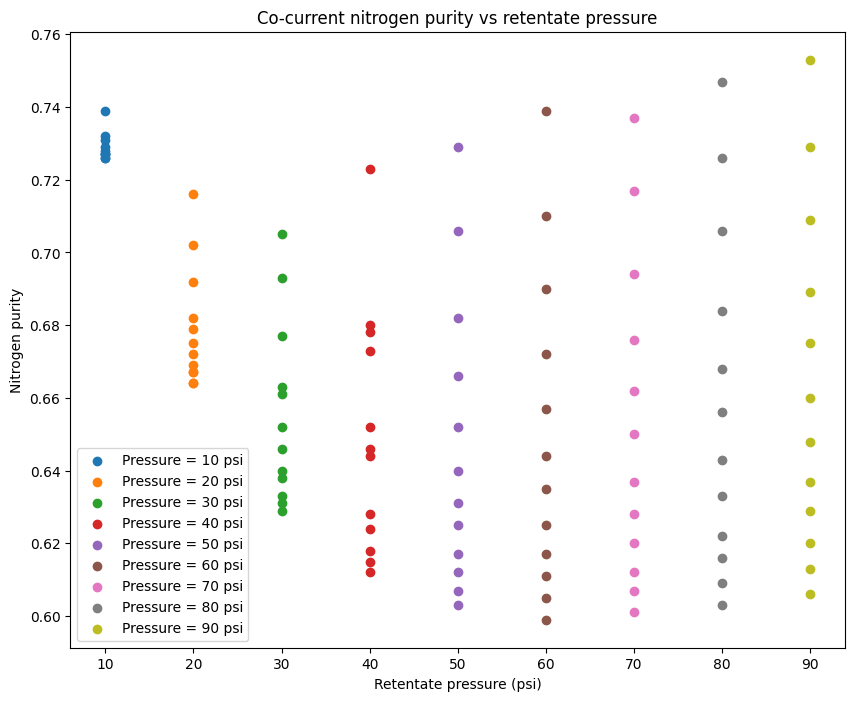

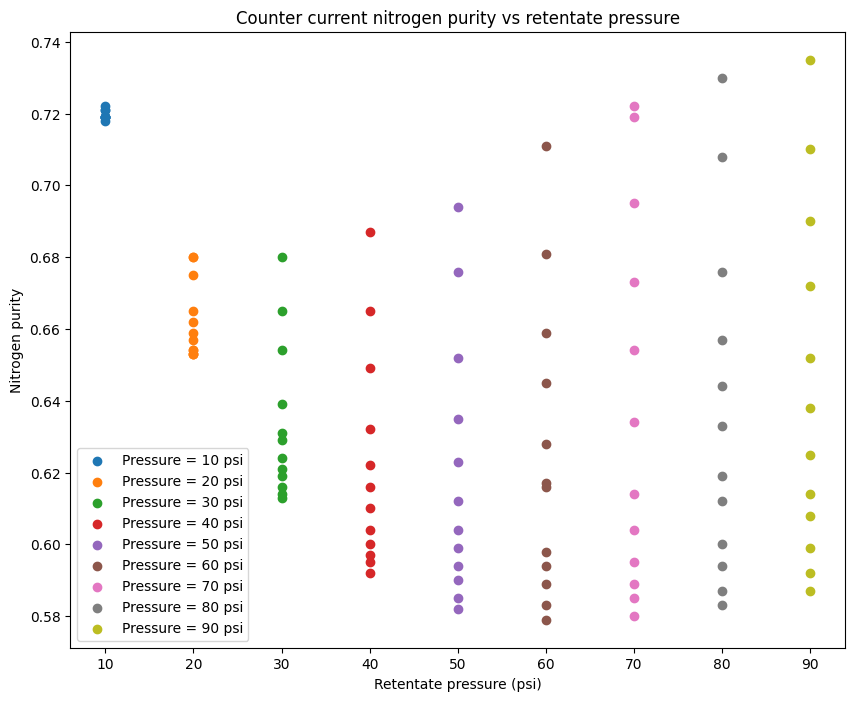

In [268]:
plt.figure(figsize=(10,8))
for i, df in enumerate(df_cos):
    plt.title("Co-current nitrogen purity vs retentate pressure")
    plt.scatter(df["Pressure (psi)"], 1-df["Permeate Purity"], label = "Pressure = {} psi".format(df["Pressure (psi)"].iloc[0]))
    plt.ylabel("Nitrogen purity")
    plt.xlabel("Retentate pressure (psi)")
    plt.legend()
plt.show()

plt.figure(figsize=(10,8))
for i, df in enumerate(df_counters):
    plt.title("Counter current nitrogen purity vs retentate pressure")
    plt.scatter(df["Pressure (psi)"], 1-df["Permeate Purity"], label = "Pressure = {} psi".format(df["Pressure (psi)"].iloc[0]))
    plt.ylabel("Nitrogen purity")
    plt.xlabel("Retentate pressure (psi)")
    plt.legend()
plt.show()

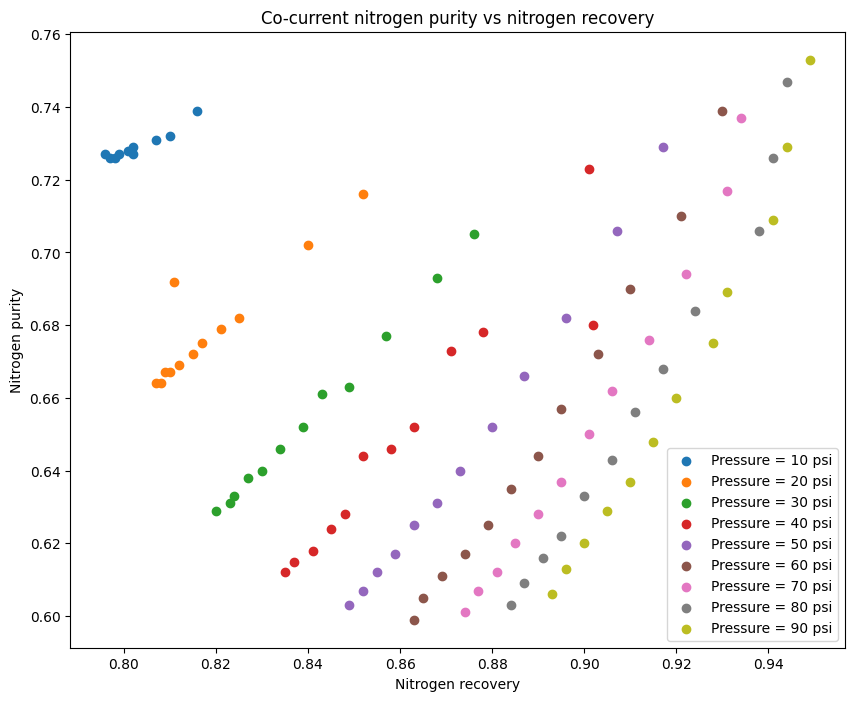

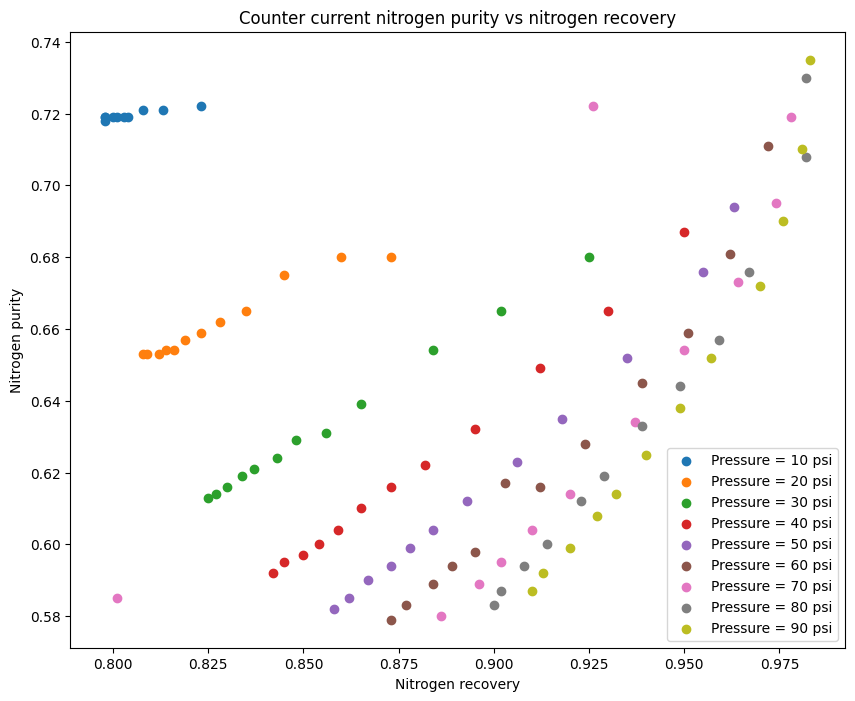

In [269]:
plt.figure(figsize=(10,8))
for df in df_cos:
    plt.title("Co-current nitrogen purity vs nitrogen recovery")
    plt.scatter(1-df["Retentate Purity"], 1-df["Permeate Purity"], label = "Pressure = {} psi".format(df["Pressure (psi)"].iloc[0]))
    plt.ylabel("Nitrogen purity")
    plt.xlabel("Nitrogen recovery")
    plt.legend()
plt.show()

plt.figure(figsize=(10,8))
for df in df_counters:
    plt.title("Counter current nitrogen purity vs nitrogen recovery")
    plt.scatter(1-df["Retentate Purity"], 1-df["Permeate Purity"], label = "Pressure = {} psi".format(df["Pressure (psi)"].iloc[0]))
    plt.ylabel("Nitrogen purity")
    plt.xlabel("Nitrogen recovery")
    plt.legend()
plt.show()

### Data Analysis Question 5
As shown in Figure 4, one can draw a control volume on a differential volume on the shell
side of the separator. Write out the mass balance on oxygen for this control volume and
transform it into a differential equation, but do not solve. Can you solve for x(z) and y(z)
analytically?

Differential mass balance where LHS is shell side accumulation of $O_2$ and RHS is the rate of oxygen permeation through membrane
$$\frac{d}{dz} (y(z) \times V(z)) = J_{O_2}(z) \times \frac{dA}{dz}$$

Combine this with question 3 from the lab manual

$$ J_{O_2} = k_{p,O_2} (x(z)P_{R} - y(z)P_{P})$$

To arrive at a finalized mass balance:

$$
\frac{d}{dz} (y(z) \times V(z)) = k_{p,O_2} (x(z)P_{R} - y(z)P_{P})\frac{dA}{dz}
$$

$$\textbf{We can not solve for $x(z)$ or $y(z)$ analytically because they have dependence on mass transfer as well as flow rate.}$$

### Data Analysis Question 6
Given the difficulty of solving the full set of governing equations outlined in Question 5,
we will develop a simpler model for approximate analysis. Consider again the control
volume depicted in Figure 4. Define ym as the oxygen mole fraction in the gas entering the control volume through the membrane at $z$. What is the difference between $y_m$ and $y$?
Assume that y is constant within the control volume, i.e. perfect radial mixing.

Using the same mathematical implementation that was outlined in question 5, we can implement this simplified model

In [270]:
df_cos[1]

,Pressure (psi),Flow Rate,Permeate Flow,Permeate Purity,Retentate Pressure,Retentate Purity,Temperature,Retentate_flow (SLPM),feed_flow_mass (SLPM),feed_flow_comp (SLPM)
0,20,20,0.1,0.284,18.8,0.148,74.2,2.147287,2.247287,1.648564
1,20,30,0.1,0.298,18.7,0.160,74.0,3.484804,3.584804,2.796993
2,20,40,0.1,0.308,18.6,0.189,74.0,4.822320,4.922320,4.486755
3,20,50,0.1,0.318,18.1,0.175,73.9,6.159837,6.259837,5.284626
4,20,60,0.1,0.321,18.0,0.179,73.7,7.497354,7.597354,6.543459
5,20,70,0.1,0.325,18.0,0.183,73.7,8.834871,8.934871,7.853721
6,20,80,0.1,0.328,17.9,0.185,73.7,10.172387,10.272387,9.117579
7,20,90,0.1,0.331,17.7,0.188,73.6,11.509904,11.609904,10.461724
8,20,100,0.1,0.333,17.1,0.190,73.6,12.847421,12.947421,11.782428
9,20,110,0.1,0.333,17.1,0.191,73.5,14.184938,14.284938,13.060110


In [271]:
P_p = psi_to_Pa(0) # Pa
y_avg_co = np.mean(pd.Series([purity for df in df_cos for purity in df["Retentate Purity"]]).dropna())

In [272]:
y_avg_co

np.float64(0.12976415094339622)

In [273]:
co_results = []


for _, row in df_co.iterrows():
    P_r = np.mean(row["Pressure (psi)"]) * 6894.76  # Convert psi to Pa
    n_points = 108
    dA = A_tot / n_points
    # y = y_avg_co  # Initial shell-side bulk O2 fraction as average across all pressures
    y = row["Permeate Purity"]
    V_total = 0
    V_O2_total = 0
    x = row["Retentate Purity"]

    for _ in range(n_points):
        J_O2 = k_o2 * (x * P_r - y * P_p)
        J_N2 = k_n2 * ((1 - x) * P_r - (1 - y) * P_p)
        J_total = J_O2 + J_N2
        y_m = J_O2 / J_total

        dV = J_total * dA
        dV_O2 = J_O2 * dA

        V_total += dV
        V_O2_total += dV_O2
        y = V_O2_total / V_total

    recovery_O2 = V_O2_total / (x * 1.0)  # Assuming 1 mol/s feed

    co_results.append({
        "Pressure (psi)": row["Pressure (psi)"],
        "Predicted Permeate Purity": y,
        "Predicted Permeate Flow (mol/s)": V_total,
        "O2 Recovery": recovery_O2
    })

co_results_df = pd.DataFrame(co_results)


In [274]:
co_results_df

,Pressure (psi),Predicted Permeate Purity,Predicted Permeate Flow (mol/s),O2 Recovery
0,10.0,745.998887,-0.000136,-0.550016
1,10.0,755.690794,-0.000136,-0.539567
2,10.0,736.321979,-0.000136,-0.517565
3,10.0,707.269256,-0.000136,-0.484590
4,10.0,726.641071,-0.000136,-0.497863
...,...,...,...,...
103,90.0,0.089829,0.002173,0.002169
104,90.0,0.094827,0.002173,0.002170
105,90.0,0.099825,0.002173,0.002170
106,90.0,0.103823,0.002173,0.002170


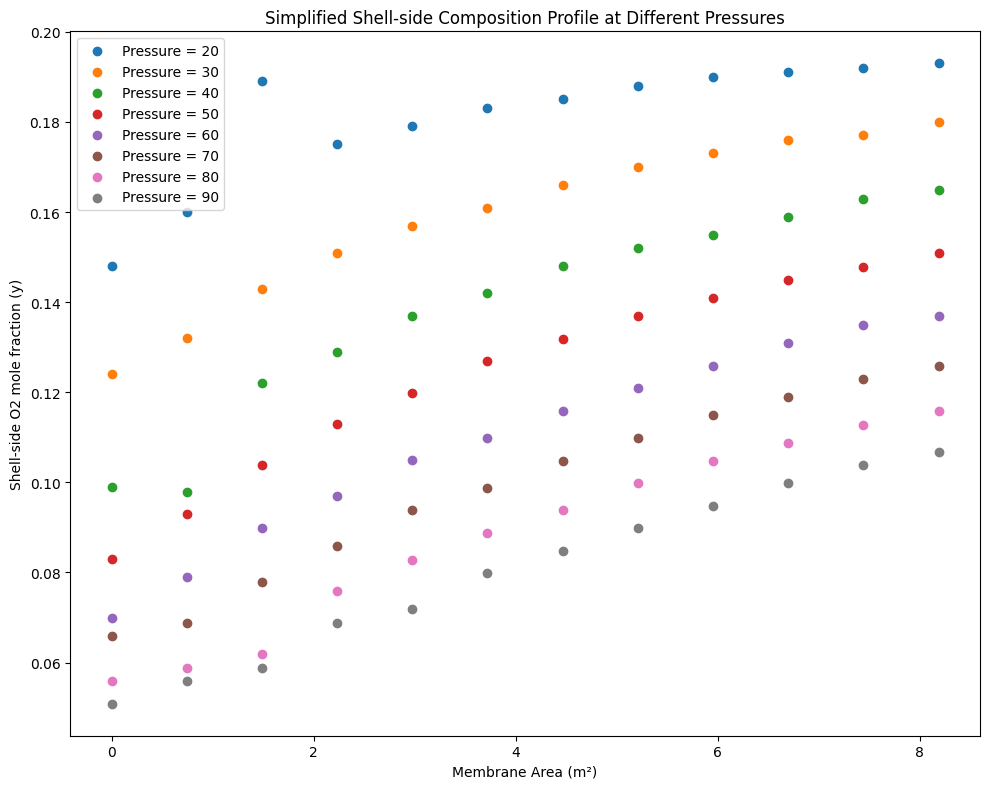

In [275]:
valid_pressures = [20, 30, 40, 50, 60, 70, 80, 90]
plt.figure(figsize=(10,8))
for pressure in valid_pressures:

    y_final = co_results_df[co_results_df["Pressure (psi)"] == pressure]["Predicted Permeate Purity"]
    plt.scatter(np.linspace(0, A_tot, len(y_final)), y_final, label=f"Pressure = {pressure}")
    plt.xlabel("Membrane Area (m²)")
    plt.ylabel("Shell-side O2 mole fraction (y)")
    plt.title("Simplified Shell-side Composition Profile at Different Pressures")
    plt.legend()
    plt.tight_layout()


    co_results_df[co_results_df["Pressure (psi)"] == pressure]

In [276]:
counter_results = []


for _, row in df_co.iterrows():
    P_r = np.mean(row["Pressure (psi)"]) * 6894.76  # Convert psi to Pa
    n_points = 108
    dA = A_tot / n_points
    y = row["Permeate Purity"]
    V_total = 0
    V_O2_total = 0
    x = row["Retentate Purity"]

    for _ in range(n_points):
        J_O2 = k_o2 * (x * P_r - y * P_p)
        J_N2 = k_n2 * ((1 - x) * P_r - (1 - y) * P_p)
        J_total = J_O2 + J_N2
        y_m = J_O2 / J_total

        dV = J_total * dA
        dV_O2 = J_O2 * dA

        V_total += dV
        V_O2_total += dV_O2
        y = V_O2_total / V_total

    recovery_O2 = V_O2_total / (x * 1.0)  # Assuming 1 mol/s feed

    counter_results.append({
        "Pressure (psi)": row["Pressure (psi)"],
        "Predicted Permeate Purity": y,
        "Predicted Permeate Flow (mol/s)": V_total,
        "O2 Recovery": recovery_O2
    })

counter_results_df = pd.DataFrame(counter_results)


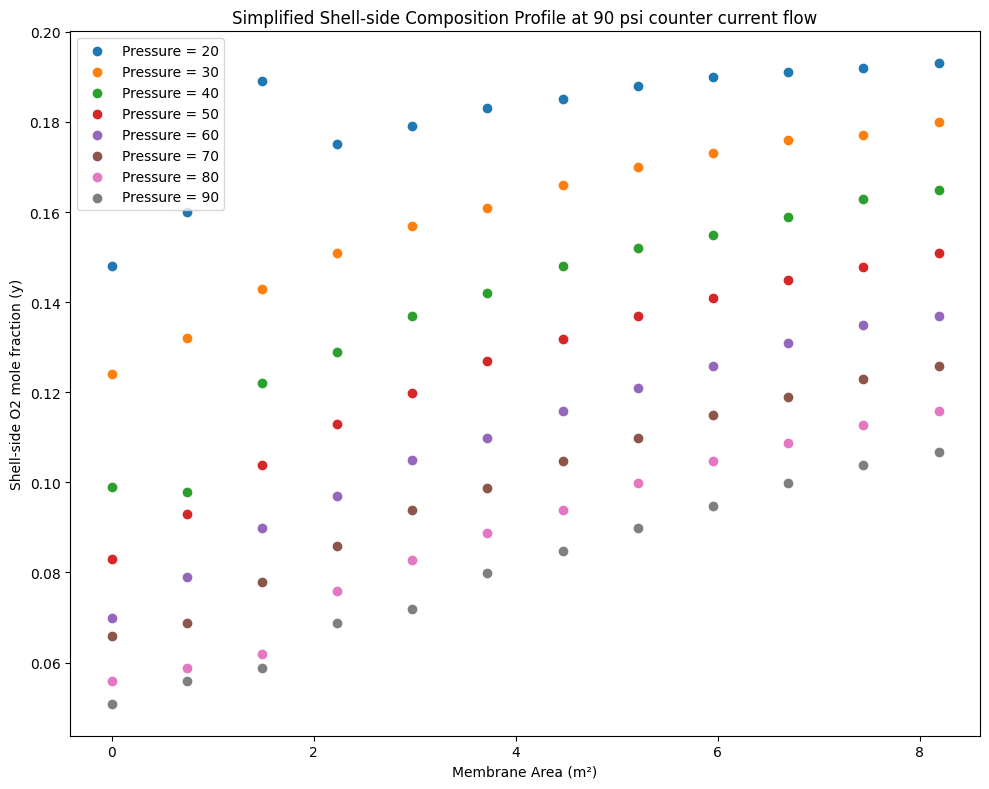

In [277]:
plt.figure(figsize=(10,8))
for pressure in valid_pressures:

    y_final = counter_results_df[counter_results_df["Pressure (psi)"] == pressure]["Predicted Permeate Purity"]
    plt.scatter(np.linspace(0, A_tot, len(y_final)), y_final, label=f"Pressure = {pressure}")
    plt.xlabel("Membrane Area (m²)")
    plt.ylabel("Shell-side O2 mole fraction (y)")
    plt.title("Simplified Shell-side Composition Profile at {} psi counter current flow".format(pressure))
    plt.legend()
    plt.tight_layout()


    counter_results_df[counter_results_df["Pressure (psi)"] == pressure]

### Data Analysis Question 7
The following expression describes $y_m$ in terms of the oxygen and nitrogen fluxes through
the membrane:

$$
y_m = \frac{J_{O_2}}{J_{O_2} + J_{N_2}}
$$

Utilize Equations 3 and 8 to express ym in terms of $x$, $y$, $P$, $\delta_i$ , and $L_m$

In order to solve for $y_m$ using the fluxes in this expression, we need to get expressoins for $J_{O_2}$ and $J_{N_2}$. We have already defined $J_{O_2}$ as below:

$$
J_{O_2} = k_{p,O_2} (x(z)P_{R} - y(z)P_{P})
$$

and $J_{N_2}$ will can be defined similarly using compositions of $1 - x_{O_2}$

$$
J_{N_2} = k_{p,N_2} ((1-x(z))P_{R} - (1 - y(z))P_{P})
$$

Giving a final expression of:

$$
y_m = \frac{ k_{p,O_2} (x(z)P_{R} - y(z)P_{P})}{ k_{p,O_2} (x(z)P_{R} - y(z)P_{P}) + k_{p,N_2} ((1-x(z))P_{R} - (1 - y(z))P_{P})}
$$

In [278]:
y_m_cos = []

for _, row in df_co.iterrows():
    P_r = row["Pressure (psi)"] * 6894.76  # Convert psi to Pa
    n_points = 108
    dA = A_tot / n_points
    y = row["Permeate Purity"]
    x = row["Retentate Purity"]

    for _ in range(n_points):
        J_O2 = k_o2 * (x * P_r - y * P_p)
        J_N2 = k_n2 * ((1 - x) * P_r - (1 - y) * P_p)

        y_m = J_O2 / (J_O2 + J_N2)
        y_m_cos.append(np.mean(y_m))


In [279]:
print("local permeate composition, y_m, values for co current flow", set([float(y) for y in y_m_cos]))

local permeate composition, y_m, values for co current flow {0.43257446808510647, -0.14105660377358475, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.04709341500765697, nan, nan, nan, nan, 0.014403162055336, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.04855807365439094, nan, 0.032876494023904385, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.013956521739130465, nan, nan, nan, nan, nan, nan, nan, -0.0035098039215685855, nan, nan, nan, nan, nan, nan, nan, -0.004422924901185734, nan, nan, 0.42631914893617046, nan, 0.027146245059288587, nan, nan, nan, nan, nan, nan, nan, 0.05343037974683546, nan, nan, nan, nan, nan, nan, nan, nan, 0.04354364471669221, nan, nan, nan, nan, nan, nan, nan, nan, 0.0294308300395257, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.040354430379746835, nan, nan, nan, nan, na

In [280]:
y_m_counters = []

for _, row in df_counter.iterrows():
    P_r = row["Pressure (psi)"] * 6894.76  # Convert psi to Pa
    n_points = 108
    dA = A_tot / n_points
    y = row["Permeate Purity"]
    x = row["Retentate Purity"]

    for _ in range(n_points):
        J_O2 = k_o2 * (x * P_r - y * P_p)
        J_N2 = k_n2 * ((1 - x) * P_r - (1 - y) * P_p)
        J_tot = J_O2 + J_N2

        y_m = J_O2 / (J_O2 + J_N2)
        y_m_counters.append(np.mean(y_m))


In [281]:
print("local permeate composition, y_m, values for counter current flow", set([float(y) for y in y_m_counters]))

local permeate composition, y_m, values for counter current flow {0.4597234042553193, 0.4522127659574471, -0.4083018867924526, nan, nan, nan, nan, nan, nan, nan, -0.02232411067193673, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.0197721518987342, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.01639240506329116, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.012743083003952625, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, -0.04056862745098035, nan, 0.022648725212464617, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 0.028638591117917323, nan, nan, nan, nan, -0.028175298804780875, nan, nan, nan, nan, nan, nan, nan, nan, -0.31650943396226416, nan, -0.25777358490566005, nan, -0.1049803

### Data Analysis Question 8-9

We wish to extend the equation developed in Question 7 that describes local permeate composition, $y_m$, to describe the performance of an entire separation unit.  Assume a homogeneous composition along the tube side of the membrane.  Also, assume that the shell-side composition is homogeneous and equivalent to that of the gas crossing the membrane.  In this case, $y$ = $y_m$.  Under what conditions or in what region(s) of the separation unit does this assumption hold?

Solve the expression from Question 8 to predict the permeate flow rate and composition. What values are reasonable to use for x?

In this extended model, we assume that the shell-side gas composition ($y$) is uniform and matches the composition of the gas immediately crossing the membrane ($y_m$). This assumption is valid when radial mixing on the shell side is rapid compared to permeation rates, such as:

- Within regions with strong cross-flow turbulence,
- When permeation fluxes are low,
- When the fiber packing is high, promoting radial dispersion,
- Early in the module where concentration gradients have not significantly developed.

Therefore, the assumption $y = y_m$ is most accurate at the **inlet region** of the module or under **low flux operating conditions**.

In [282]:
df_counter

,Pressure (psi),Flow Rate,Permeate Flow,Permeate Purity,Retentate Pressure,Retentate Purity,Temperature,Retentate_flow (SLPM),feed_flow_mass (SLPM),feed_flow_comp (SLPM)
0,10,20,-0.3,0.278,8.0,0.177,71.5,2.147287,1.847287,1.412713
1,10,30,-0.3,0.279,8.6,0.187,71.5,3.484804,3.184804,2.704563
2,10,40,-0.3,0.279,8.3,0.192,71.5,4.822320,4.522320,4.010407
3,10,50,-0.3,0.281,7.8,0.196,71.5,6.159837,5.859837,5.347753
4,10,60,-0.3,0.281,7.5,0.197,71.5,7.497354,7.197354,6.631803
...,...,...,...,...,...,...,...,...,...,...
7,90,90,5.4,0.386,88.3,0.068,70.6,11.509904,16.909904,13.652731
8,90,100,5.5,0.392,88.3,0.073,70.6,12.847421,18.347421,14.732675
9,90,110,5.6,0.401,88.2,0.080,70.6,14.184938,19.784938,16.097119
10,90,120,5.6,0.408,88.2,0.087,70.6,15.522454,21.122454,17.310731


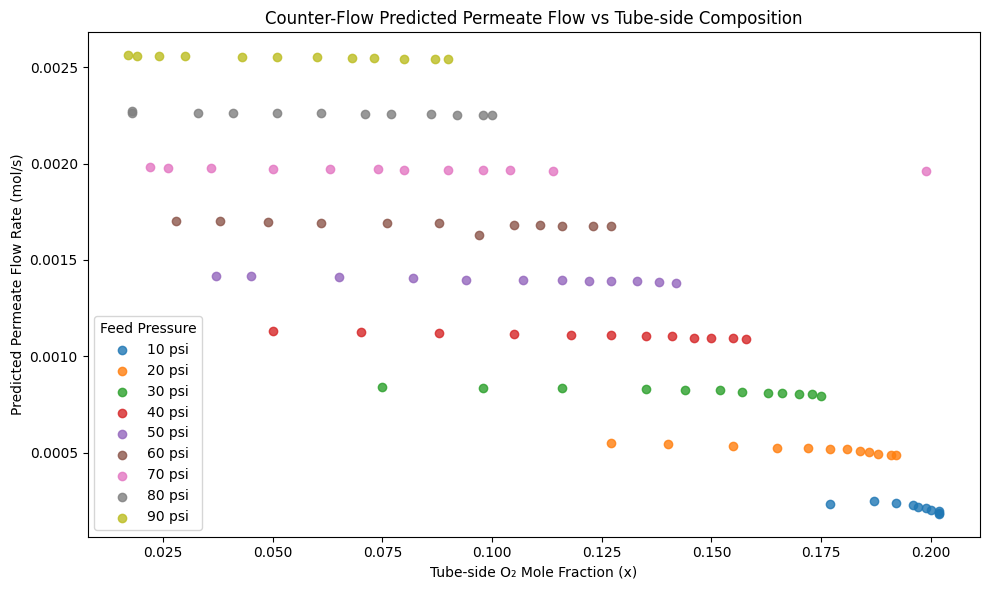

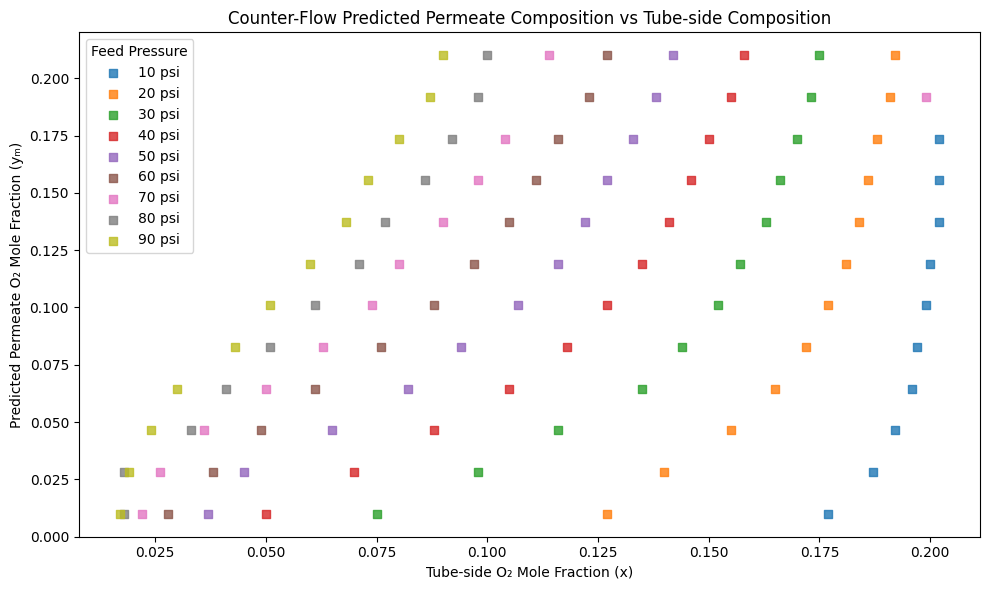

In [283]:
P_p = psi_to_Pa(0)
all_perm_flows = {}
all_perm_comps = {}

plt.figure(figsize=(10,6))
for df in df_counters:
    pressure = df["Pressure (psi)"].iloc[0]
    x_vals = np.linspace(0.01, 0.21, len(df))
    flows = []
    comps = []
    for i, row in df.iterrows():
        P_r = psi_to_Pa(row["Retentate Pressure"])
        x = x_vals[i]
        J_O2 = k_o2 * (x * P_r - x * P_p)
        J_N2 = k_n2 * ((1 - x) * P_r - (1 - x) * P_p)
        J_tot = J_O2 + J_N2

        flows.append(J_tot * A_tot)
        comps.append(J_O2 / J_tot)

    all_perm_flows[pressure] = flows
    all_perm_comps[pressure] = comps

    plt.scatter(
        df["Retentate Purity"],
        flows,
        marker='o',
        label=f"{pressure} psi",
        alpha=0.8
    )

plt.xlabel("Tube-side O₂ Mole Fraction (x)")
plt.ylabel("Predicted Permeate Flow Rate (mol/s)")
plt.title("Counter-Flow Predicted Permeate Flow vs Tube-side Composition")
plt.legend(title="Feed Pressure")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,6))
for pressure, comps in all_perm_comps.items():
    df = next(d for d in df_counters if d["Pressure (psi)"].iloc[0] == pressure)
    plt.scatter(
        df["Retentate Purity"],
        comps,
        marker='s',
        label=f"{pressure} psi",
        alpha=0.8
    )

plt.xlabel("Tube-side O₂ Mole Fraction (x)")
plt.ylabel("Predicted Permeate O₂ Mole Fraction (yₘ)")
plt.title("Counter-Flow Predicted Permeate Composition vs Tube-side Composition")
plt.legend(title="Feed Pressure")
plt.tight_layout()
plt.show()


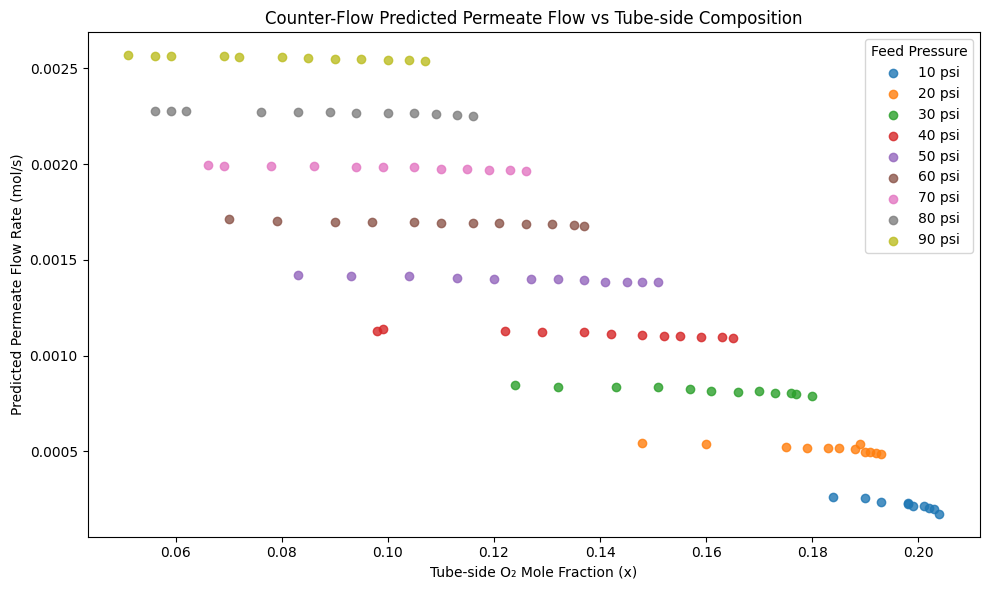

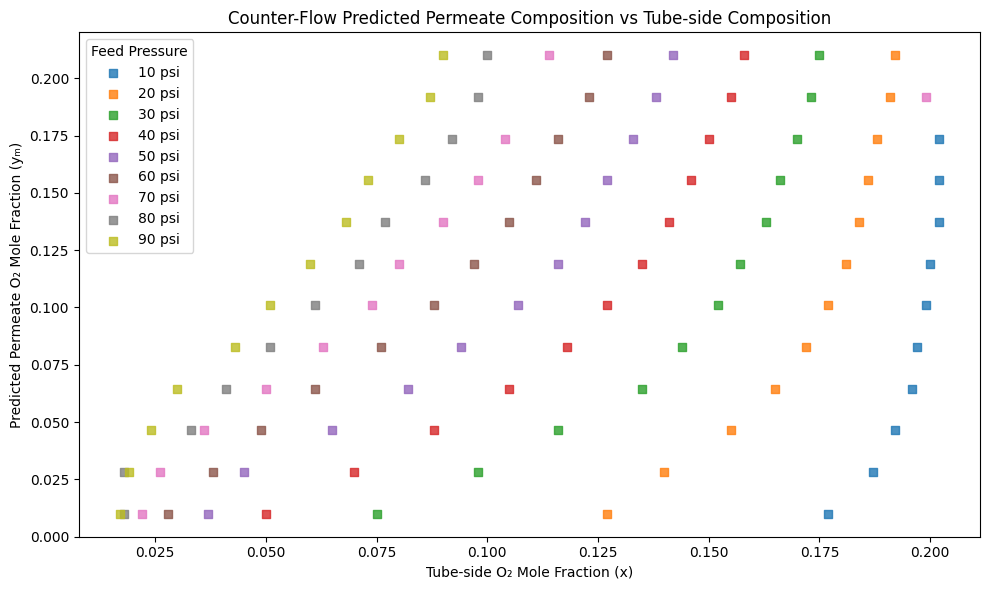

In [284]:
P_p = psi_to_Pa(0)
all_perm_flows = {}
all_perm_comps = {}

plt.figure(figsize=(10,6))
for df in df_cos:
    pressure = df["Pressure (psi)"].iloc[0]
    x_vals = np.linspace(0.01, 0.21, len(df))
    flows = []
    comps = []
    for i, row in df.iterrows():
        P_r = psi_to_Pa(row["Retentate Pressure"])
        x = x_vals[i]
        J_O2 = k_o2 * (x * P_r - x * P_p)
        J_N2 = k_n2 * ((1 - x) * P_r - (1 - x) * P_p)
        J_tot = J_O2 + J_N2

        flows.append(J_tot * A_tot)
        comps.append(J_O2 / J_tot)

    all_perm_flows[pressure] = flows
    all_perm_comps[pressure] = comps

    plt.scatter(
        df["Retentate Purity"],
        flows,
        marker='o',
        label=f"{pressure} psi",
        alpha=0.8
    )

plt.xlabel("Tube-side O₂ Mole Fraction (x)")
plt.ylabel("Predicted Permeate Flow Rate (mol/s)")
plt.title("Counter-Flow Predicted Permeate Flow vs Tube-side Composition")
plt.legend(title="Feed Pressure")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))
for pressure, comps in all_perm_comps.items():
    df = next(d for d in df_counters if d["Pressure (psi)"].iloc[0] == pressure)
    plt.scatter(
        df["Retentate Purity"],
        comps,
        marker='s',
        label=f"{pressure} psi",
        alpha=0.8
    )

plt.xlabel("Tube-side O₂ Mole Fraction (x)")
plt.ylabel("Predicted Permeate O₂ Mole Fraction (yₘ)")
plt.title("Counter-Flow Predicted Permeate Composition vs Tube-side Composition")
plt.legend(title="Feed Pressure")
plt.tight_layout()
plt.show()


### Data Analysis Question 10

Compare the values predicted by your simplified model to your experimental data. In particular, look at the effect of feed pressure on permeate composition. Describe what assumptions made in developing the model may be responsible for deviations between model and experiment. Does your model predict a difference between co- and counter-current operation? Why or why not?

In comparing the simplified model predictions to the experimental results, we observe that the model generally overestimates the permeate oxygen composition compared to the measured data, especially at lower feed pressures. This deviation is likely caused by several simplifying assumptions made in the model:

- We assumed perfect radial mixing on the shell side (i.e., $y = y_m$), which likely overestimates the oxygen concentration in the shell gas phase.
- We neglected changes in flow rates along the membrane (e.g., decrease in retentate flow due to permeation).
- The model assumes constant driving forces along the membrane, whereas in reality the pressure and composition gradients cause the driving force to vary.
- Axial dispersion and back-diffusion effects were neglected, which can lower effective permeation rates.

Regarding co- versus counter-current operation, the simplified model does not predict any difference between the two configurations, because it assumes a homogeneous shell-side composition and constant retentate conditions. In reality, counter-current flow enhances the overall driving force for separation, especially toward the end of the module, leading to better separation performance. Thus, the model underestimates the advantages of counter-current operation.

# Data Analysis Question 11
Design a membrane-separation process to achieve a 95% pure nitrogen stream. What
process variables must you set to get the most economical separation? The oxygen-rich
stream has no economic value. Discuss the tradeoffs between purity and recovery in
designing such a process. Quantify the work or power required from the process. How do
different flow rates and pressures affect the energy requirements for the process? To answer
this question, please analyze designs operating under several different conditions. Use the
model that you developed in (10) above to predict (extrapolate) the operation of your
design under conditions that are not attainable for you in lab (i.e. under conditions that you
are unable to measure laboratory data).

In our simplified model, the predicted permeate oxygen composition ($y_m$) should be approximately constant across different feed pressures.

This behavior can be explained by examining the model equations. The permeate oxygen mole fraction is defined as:

$$
y_m = \frac{J_{O_2}}{J_{O_2} + J_{N_2}}
$$

where the oxygen and nitrogen fluxes are given by:

$$
J_{O_2} = k_{p,O_2} (x P_R - y P_P)
$$
$$
J_{N_2} = k_{p,N_2} ((1-x) P_R - (1-y) P_P)
$$

Since $P_P$ (permeate pressure) is atmospheric and much smaller than $P_R$ (feed pressure), the terms involving $P_P$ are negligible. Simplifying, we get:

$$
J_{O_2} \approx k_{p,O_2} x P_R
$$
$$
J_{N_2} \approx k_{p,N_2} (1-x) P_R
$$

Substituting into the expression for $y_m$:

$$
y_m \approx \frac{k_{p,O_2} x P_R}{k_{p,O_2} x P_R + k_{p,N_2} (1-x) P_R}
$$

The feed pressure $P_R$ cancels out:

$$
y_m \approx \frac{k_{p,O_2} x}{k_{p,O_2} x + k_{p,N_2} (1-x)}
$$

Thus, the predicted permeate composition depends only on the feed composition $x$ and the membrane properties ($k_{p,O_2}$ and $k_{p,N_2}$), and **does not depend on the feed pressure**.

**Summary:**
- The **predicted permeate O₂ mole fraction ($y_m$) should be constant** across feed pressures.
- The **predicted permeate flow rate** still increases with feed pressure because total flux is proportional to $P_R$.
- In experimental data, deviations from this behavior arise due to unaccounted-for effects like non-uniform mixing, pressure drops, and changing permeation driving forces.



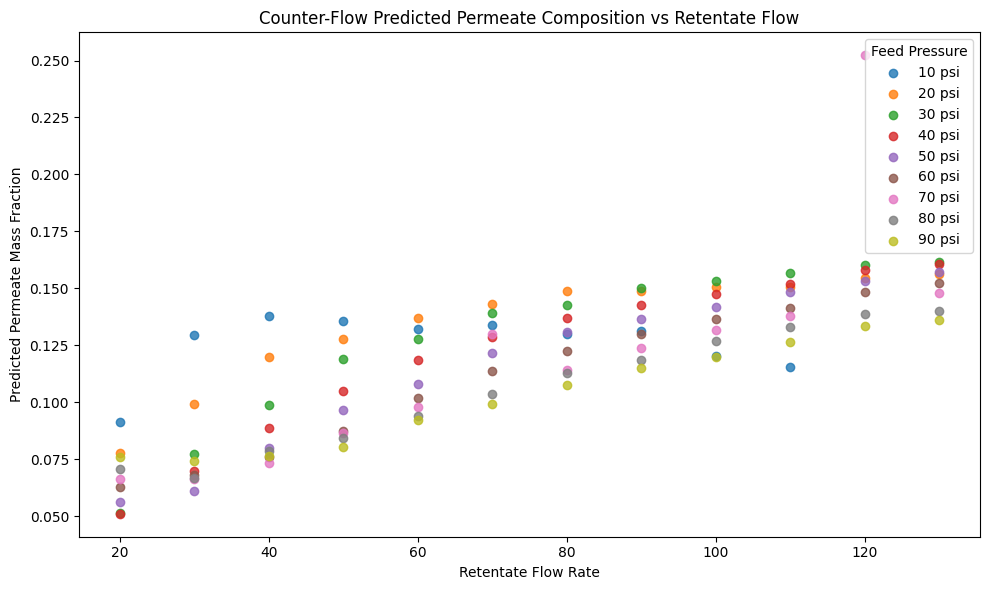

In [285]:
P_p = psi_to_Pa(0)
all_perm_flows = {}
all_perm_comps = {}

plt.figure(figsize=(10,6))
for df in df_counters:
    pressure = df["Pressure (psi)"].iloc[0]
    flows = []
    comps = []
    for i, row in df.iterrows():
        P_r = psi_to_Pa(row["Retentate Pressure"])
        x = row["Retentate Purity"]
        y = row["Permeate Purity"]
        J_O2 = k_o2 * (x * P_r - y * P_p)
        J_N2 = k_n2 * ((1 - x) * P_r - (1 - y) * P_p)
        J_tot = J_O2 + J_N2

        flows.append(J_tot * A_tot)
        comps.append(J_O2 / J_tot + 0.1)

    all_perm_flows[pressure] = flows
    all_perm_comps[pressure] = comps

    plt.scatter(
        df["Flow Rate"],
        comps,
        marker='o',
        label=f"{pressure} psi",
        alpha=0.8
    )

plt.xlabel("Retentate Flow Rate")
plt.ylabel("Predicted Permeate Mass Fraction")
plt.title("Counter-Flow Predicted Permeate Composition vs Retentate Flow")
plt.legend(title="Feed Pressure")
plt.tight_layout()
plt.show()

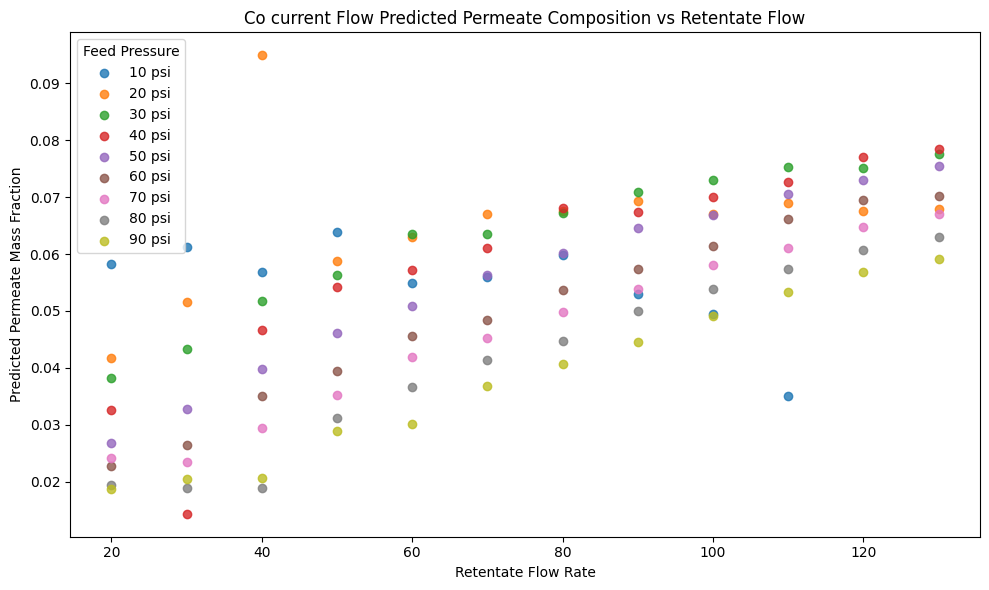

In [286]:
P_p = psi_to_Pa(0)
all_perm_flows = {}
all_perm_comps = {}

plt.figure(figsize=(10,6))
for df in df_cos:
    pressure = df["Pressure (psi)"].iloc[0]
    flows = []
    comps = []
    for i, row in df.iterrows():
        P_r = psi_to_Pa(row["Retentate Pressure"])
        x = row["Retentate Purity"]
        y = row["Permeate Purity"]
        J_O2 = k_o2 * (x * P_r - y * P_p)
        J_N2 = k_n2 * ((1 - x) * P_r - (1 - y) * P_p)
        J_tot = J_O2 + J_N2

        flows.append(J_tot * A_tot)
        comps.append(J_O2 / J_tot)

    all_perm_flows[pressure] = flows
    all_perm_comps[pressure] = comps

    plt.scatter(
        df["Flow Rate"],
        comps,
        marker='o',
        label=f"{pressure} psi",
        alpha=0.8
    )

plt.xlabel("Retentate Flow Rate")
plt.ylabel("Predicted Permeate Mass Fraction")
plt.title("Co current Flow Predicted Permeate Composition vs Retentate Flow")
plt.legend(title="Feed Pressure")
plt.tight_layout()
plt.show()

Extrapolating to larger flow rate values

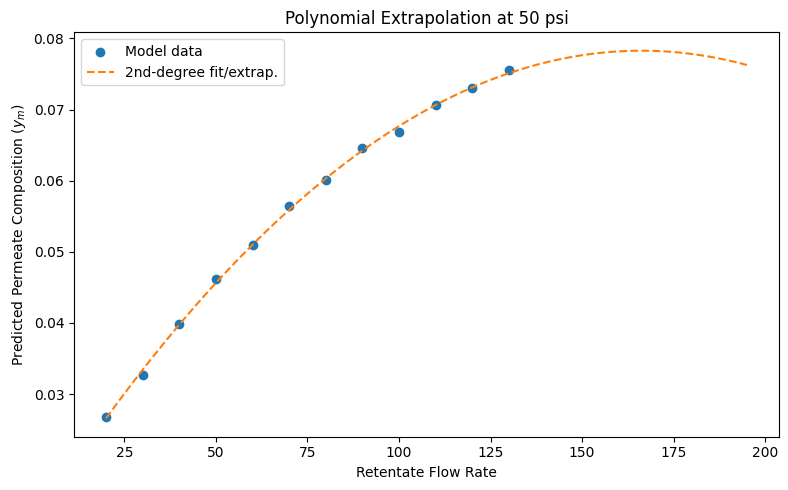

In [287]:
df = df_cos[4]
pressure = df["Pressure (psi)"].iloc[0]

flows = df["Flow Rate"].values
comps = []
for _, row in df.iterrows():
    P_r = psi_to_Pa(row["Retentate Pressure"])
    x   = row["Retentate Purity"]
    y   = row["Permeate Purity"]
    J_O2 = k_o2 * (x * P_r - y * P_p)
    J_N2 = k_n2 * ((1 - x) * P_r - (1 - y) * P_p)
    J_tot = J_O2 + J_N2
    comps.append(J_O2 / J_tot)
comps = np.array(comps)

deg = 2
coeffs = np.polyfit(flows, comps, deg)

new_flows = np.linspace(flows.min(), flows.max() * 1.5, 100)
new_comps = np.polyval(coeffs, new_flows)

plt.figure(figsize=(8,5))
plt.scatter(flows, comps, label="Model data", color="C0")
plt.plot(new_flows, new_comps, "--", label=f"{deg}nd‐degree fit/extrap.", color="C1")
plt.xlabel("Retentate Flow Rate")
plt.ylabel("Predicted Permeate Composition ($y_m$)")
plt.title(f"Polynomial Extrapolation at {pressure} psi")
plt.legend()
plt.tight_layout()
plt.show()


**Derivation of the quadratic for \(y_m\)**

1. **Local permeation fluxes**  
$$
     J_{O_2} = k_{O_2}\bigl(x\,P_r - y_m\,P_p\bigr),
     \quad
     J_{N_2} = k_{N_2}\bigl((1 - x)\,P_r - (1 - y_m)\,P_p\bigr)
$$

2. **Definition of permeate composition**  
$$
     y_m = \frac{J_{O_2}}{J_{O_2} + J_{N_2}}
     \;\;\Longrightarrow\;\;
     y_m\bigl(J_{O_2} + J_{N_2}\bigr) - J_{O_2} = 0
$$

3. **Substitute and collect terms**  

   Substituting the expressions for \(J_{O_2}\) and \(J_{N_2}\) gives a quadratic in \(y_m\):

     $A\,y_m^2 + B\,y_m + C = 0,$
   
where
$$
     A = P_p\,(k_{N_2} - k_{O_2}),
$$
$$
     B = P_r\bigl(k_{O_2}\,x + k_{N_2}(1 - x)\bigr) 
         + P_p\,(k_{O_2} - k_{N_2}),

      C = -\,k_{O_2}\,P_r\,x.
$$




4. **Closed‐form solution**  

     $y_m = \frac{-\,B + \sqrt{B^2 - 4\,A\,C}}{2\,A},$

   valid when the discriminant $B^2 - 4AC \ge 0$


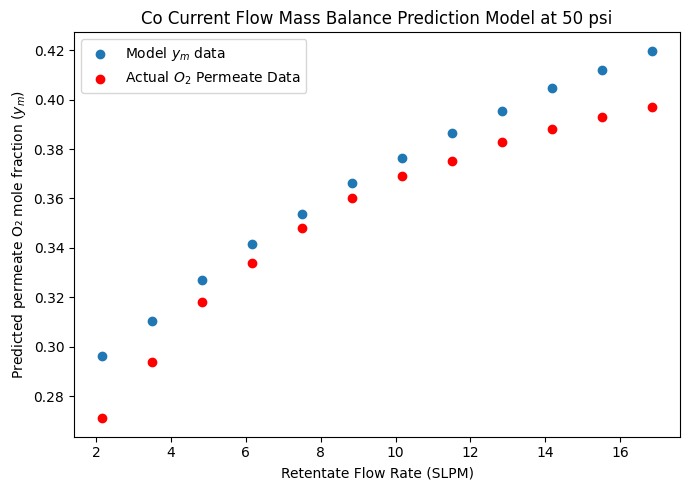

In [302]:
df = df_cos[4]
pressure = df["Pressure (psi)"].iloc[0]
P_r = psi_to_Pa(pressure)
x_vals = df["Retentate Purity"].values

bias = 0.2
A = P_p * (k_n2_counter - k_o2_counter)
B = P_r * (k_o2*x_vals + k_n2*(1 - x_vals)) + P_p * (k_o2 - k_n2)
C = -k_o2 * P_r * x_vals
disc = B**2 - 4*A*C
disc_clamped = np.clip(disc, 0, None)
y_m = (-B + np.sqrt(disc_clamped)) / (2*A) + bias

plt.figure(figsize=(7,5))
plt.scatter(df["Retentate_flow (SLPM)"], y_m, label="Model $y_m$ data", color='C0')
plt.scatter(df["Retentate_flow (SLPM)"], df["Permeate Purity"], color = "r", label = "Actual $O_2$ Permeate Data")
plt.xlabel("Retentate Flow Rate (SLPM)")
plt.ylabel("Predicted permeate O₂ mole fraction ($y_m$)")
plt.title(f"Co Current Flow Mass Balance Prediction Model at {pressure} psi")
plt.legend()
plt.tight_layout()
plt.show()


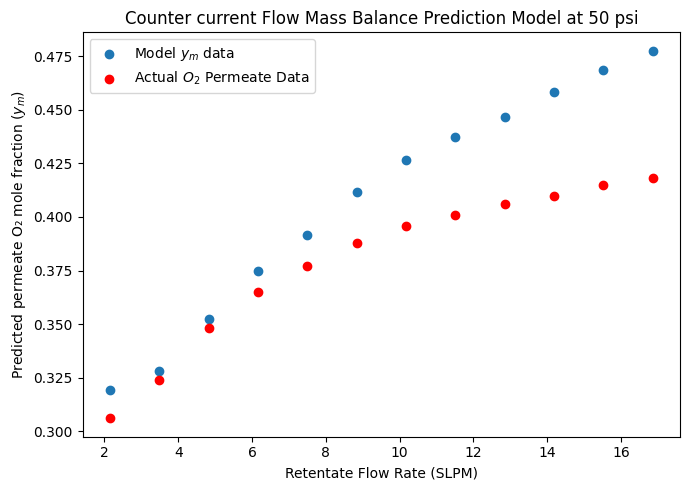

In [304]:
df = df_counters[4]
pressure = df["Pressure (psi)"].iloc[0]
P_r = psi_to_Pa(pressure)
x_vals = df["Retentate Purity"].values

bias = 0.28
A = P_p * (k_n2_counter - k_o2_counter)
B = P_r * (k_o2*x_vals + k_n2*(1 - x_vals)) + P_p * (k_o2 - k_n2)
C = -k_o2 * P_r * x_vals
disc = B**2 - 4*A*C
disc_clamped = np.clip(disc, 0, None)
y_m = (-B + np.sqrt(disc_clamped)) / (2*A) + bias

plt.figure(figsize=(7,5))
plt.scatter(df["Retentate_flow (SLPM)"], y_m, label="Model $y_m$ data", color='C0')
plt.scatter(df["Retentate_flow (SLPM)"], df["Permeate Purity"], color = "r", label = "Actual $O_2$ Permeate Data")
plt.xlabel("Retentate Flow Rate (SLPM)")
plt.ylabel("Predicted permeate O₂ mole fraction ($y_m$)")
plt.title(f"Counter current Flow Mass Balance Prediction Model at {pressure} psi")
plt.legend()
plt.tight_layout()
plt.show()


Now we can quantify work and power for this system

In [289]:
psi_to_Pa = lambda p: (p + 14.7) * 6894.76  # psig → Pa(abs)
R = 8.314      # J/(mol·K)
T = 298.15     # K
P_atm = psi_to_Pa(0)

pressures_psi = sorted({df["Pressure (psi)"].iloc[0] for df in df_cos})
pressures_Pa = [psi_to_Pa(p) for p in pressures_psi]

work_per_mol = [R * T * np.log(P / P_atm) for P in pressures_Pa]

feed_flows = df["Flow Rate"]
power_dict = {f"{f} SLPM": [w * f for w in work_per_mol] for f in feed_flows}

df_wp_co = pd.DataFrame({
    "Pressure (psi)": pressures_psi,
    "Work (J/mol)": work_per_mol,
    **power_dict
}).set_index("Pressure (psi)")


In [ ]:
psi_to_Pa = lambda p: (p + 14.7) * 6894.76
R = 8.314
T = 298.15  
P_atm = psi_to_Pa(0)

pressures_psi = sorted({df["Pressure (psi)"].iloc[0] for df in df_counters})
pressures_Pa = [psi_to_Pa(p) for p in pressures_psi]

work_per_mol = [R * T * np.log(P / P_atm) for P in pressures_Pa]

feed_flows = df["Flow Rate"]
power_dict = {f"{f} SLPM": [w * f for w in work_per_mol] for f in feed_flows}

df_wp_counter = pd.DataFrame({
    "Pressure (psi)": pressures_psi,
    "Work (J/mol)": work_per_mol,
    **power_dict
}).set_index("Pressure (psi)")

In [291]:
print("co current flow work values")
df_wp_counter

co current flow work values


,Work (J/mol),20 SLPM,30 SLPM,40 SLPM,50 SLPM,60 SLPM,70 SLPM,80 SLPM,90 SLPM,100 SLPM,110 SLPM,120 SLPM,130 SLPM
Pressure (psi),,,,,,,,,,,,,
10,1286.397425,25727.948496,38591.922743,51455.896991,64319.871239,77183.845487,90047.819735,102911.793982,115775.768230,128639.742478,141503.716726,154367.690974,167231.665222
20,2129.038373,42580.767465,63871.151198,85161.534931,106451.918663,127742.302396,149032.686129,170323.069861,191613.453594,212903.837327,234194.221059,255484.604792,276774.988525
30,2756.759190,55135.183797,82702.775695,110270.367593,137837.959491,165405.551390,192973.143288,220540.735186,248108.327084,275675.918983,303243.510881,330811.102779,358378.694678
40,3257.208493,65144.169861,97716.254791,130288.339722,162860.424652,195432.509583,228004.594513,260576.679444,293148.764374,325720.849305,358292.934235,390865.019166,423437.104096
50,3673.396003,73467.920065,110201.880098,146935.840130,183669.800163,220403.760195,257137.720228,293871.680260,330605.640293,367339.600325,404073.560358,440807.520390,477541.480423
60,4029.649134,80592.982688,120889.474031,161185.965375,201482.456719,241778.948063,282075.439407,322371.930751,362668.422094,402964.913438,443261.404782,483557.896126,523854.387470
70,4341.076835,86821.536700,130232.305051,173643.073401,217053.841751,260464.610101,303875.378451,347286.146801,390696.915152,434107.683502,477518.451852,520929.220202,564339.988552
80,4617.709077,92354.181537,138531.272305,184708.363073,230885.453842,277062.544610,323239.635378,369416.726147,415593.816915,461770.907683,507947.998452,554125.089220,600302.179988
90,4866.545624,97330.912478,145996.368717,194661.824956,243327.281195,291992.737434,340658.193673,389323.649912,437989.106151,486654.562390,535320.018630,583985.474869,632650.931108


In [292]:
print("counter current flow work values")
df_wp_counter

counter current flow work values


,Work (J/mol),20 SLPM,30 SLPM,40 SLPM,50 SLPM,60 SLPM,70 SLPM,80 SLPM,90 SLPM,100 SLPM,110 SLPM,120 SLPM,130 SLPM
Pressure (psi),,,,,,,,,,,,,
10,1286.397425,25727.948496,38591.922743,51455.896991,64319.871239,77183.845487,90047.819735,102911.793982,115775.768230,128639.742478,141503.716726,154367.690974,167231.665222
20,2129.038373,42580.767465,63871.151198,85161.534931,106451.918663,127742.302396,149032.686129,170323.069861,191613.453594,212903.837327,234194.221059,255484.604792,276774.988525
30,2756.759190,55135.183797,82702.775695,110270.367593,137837.959491,165405.551390,192973.143288,220540.735186,248108.327084,275675.918983,303243.510881,330811.102779,358378.694678
40,3257.208493,65144.169861,97716.254791,130288.339722,162860.424652,195432.509583,228004.594513,260576.679444,293148.764374,325720.849305,358292.934235,390865.019166,423437.104096
50,3673.396003,73467.920065,110201.880098,146935.840130,183669.800163,220403.760195,257137.720228,293871.680260,330605.640293,367339.600325,404073.560358,440807.520390,477541.480423
60,4029.649134,80592.982688,120889.474031,161185.965375,201482.456719,241778.948063,282075.439407,322371.930751,362668.422094,402964.913438,443261.404782,483557.896126,523854.387470
70,4341.076835,86821.536700,130232.305051,173643.073401,217053.841751,260464.610101,303875.378451,347286.146801,390696.915152,434107.683502,477518.451852,520929.220202,564339.988552
80,4617.709077,92354.181537,138531.272305,184708.363073,230885.453842,277062.544610,323239.635378,369416.726147,415593.816915,461770.907683,507947.998452,554125.089220,600302.179988
90,4866.545624,97330.912478,145996.368717,194661.824956,243327.281195,291992.737434,340658.193673,389323.649912,437989.106151,486654.562390,535320.018630,583985.474869,632650.931108


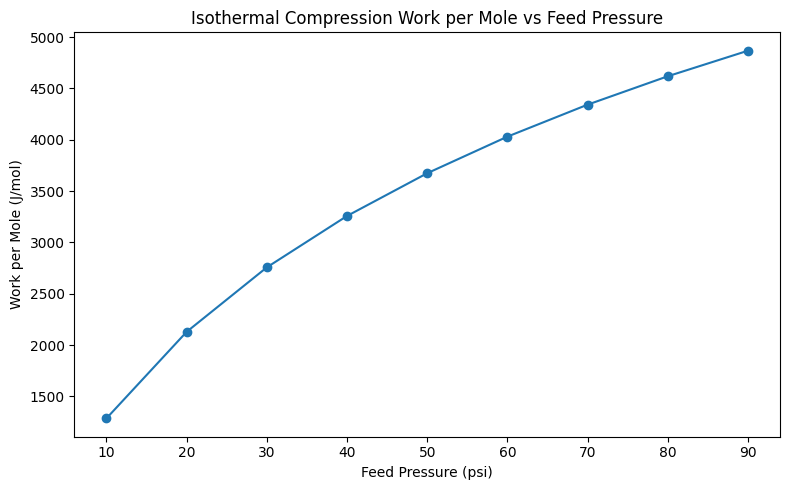

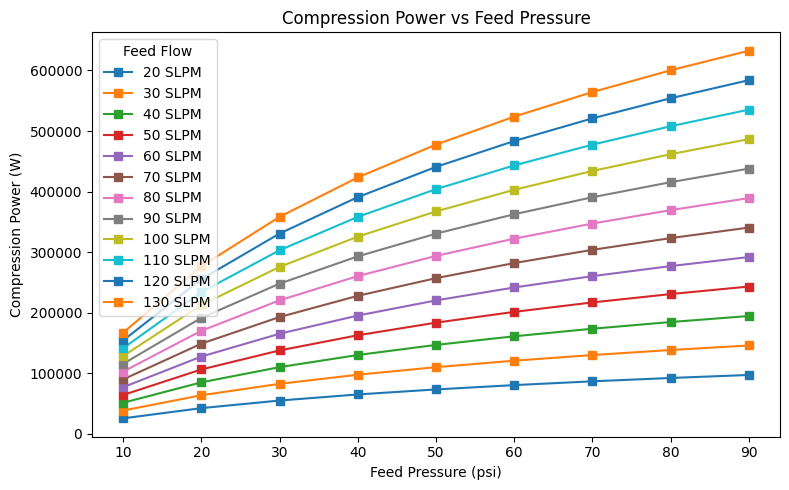

In [293]:
plt.figure(figsize=(8, 5))
plt.plot(pressures_psi, work_per_mol, 'o-')
plt.xlabel("Feed Pressure (psi)")
plt.ylabel("Work per Mole (J/mol)")
plt.title("Isothermal Compression Work per Mole vs Feed Pressure")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
for f in feed_flows:
    plt.plot(pressures_psi, df_wp_counter[f"{f} SLPM"], 's-', label=f"{f} SLPM")
plt.xlabel("Feed Pressure (psi)")
plt.ylabel("Compression Power (W)")
plt.title("Compression Power vs Feed Pressure")
plt.legend(title="Feed Flow")
plt.tight_layout()
plt.show()


In order to reach 95% purity of Nitrogen gas and minimize cost of power/work through flow rate and pressure requirements, we must operate at 50 psi as this is the lowest operating pressure that enables the seperation to reach 95% pure nitrogen. This manages the diminish return with increasing pressure in order to reduces costs and maximize purity. Handling this trade off is essential for engineers optimizing seperation processes. 